In [1]:
import os, sys
import glob
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import cv2
from skimage.transform import rotate

In [2]:
pdf = os.path.join(os.getcwd(), 'pdf')
CELLPHONE_IMG_PATH = os.path.join(pdf, 'minidataset_cell')
DB_PATH            = os.path.join(pdf, 'mini_dataset_png')

In [3]:
orb = cv2.ORB_create()

In [4]:
png_paths = glob.glob(os.path.join(DB_PATH, '*.png'))

In [5]:
db = {}

In [6]:
for i in range(len(png_paths)):
    img = cv2.imread(png_paths[i], 0)
    kp, des = orb.detectAndCompute(img, None)
    db[png_paths[i]] = (kp, des)
    print("Finish computing SIFT descriptor {:}/{:}".format(i+1, len(png_paths)))

Finish computing SIFT descriptor 1/210
Finish computing SIFT descriptor 2/210
Finish computing SIFT descriptor 3/210
Finish computing SIFT descriptor 4/210
Finish computing SIFT descriptor 5/210
Finish computing SIFT descriptor 6/210
Finish computing SIFT descriptor 7/210
Finish computing SIFT descriptor 8/210
Finish computing SIFT descriptor 9/210
Finish computing SIFT descriptor 10/210
Finish computing SIFT descriptor 11/210
Finish computing SIFT descriptor 12/210
Finish computing SIFT descriptor 13/210
Finish computing SIFT descriptor 14/210
Finish computing SIFT descriptor 15/210
Finish computing SIFT descriptor 16/210
Finish computing SIFT descriptor 17/210
Finish computing SIFT descriptor 18/210
Finish computing SIFT descriptor 19/210
Finish computing SIFT descriptor 20/210
Finish computing SIFT descriptor 21/210
Finish computing SIFT descriptor 22/210
Finish computing SIFT descriptor 23/210
Finish computing SIFT descriptor 24/210
Finish computing SIFT descriptor 25/210
Finish co

Finish computing SIFT descriptor 205/210
Finish computing SIFT descriptor 206/210
Finish computing SIFT descriptor 207/210
Finish computing SIFT descriptor 208/210
Finish computing SIFT descriptor 209/210
Finish computing SIFT descriptor 210/210


In [156]:
query_path = os.path.join(CELLPHONE_IMG_PATH, 'IMG_9146.jpg')

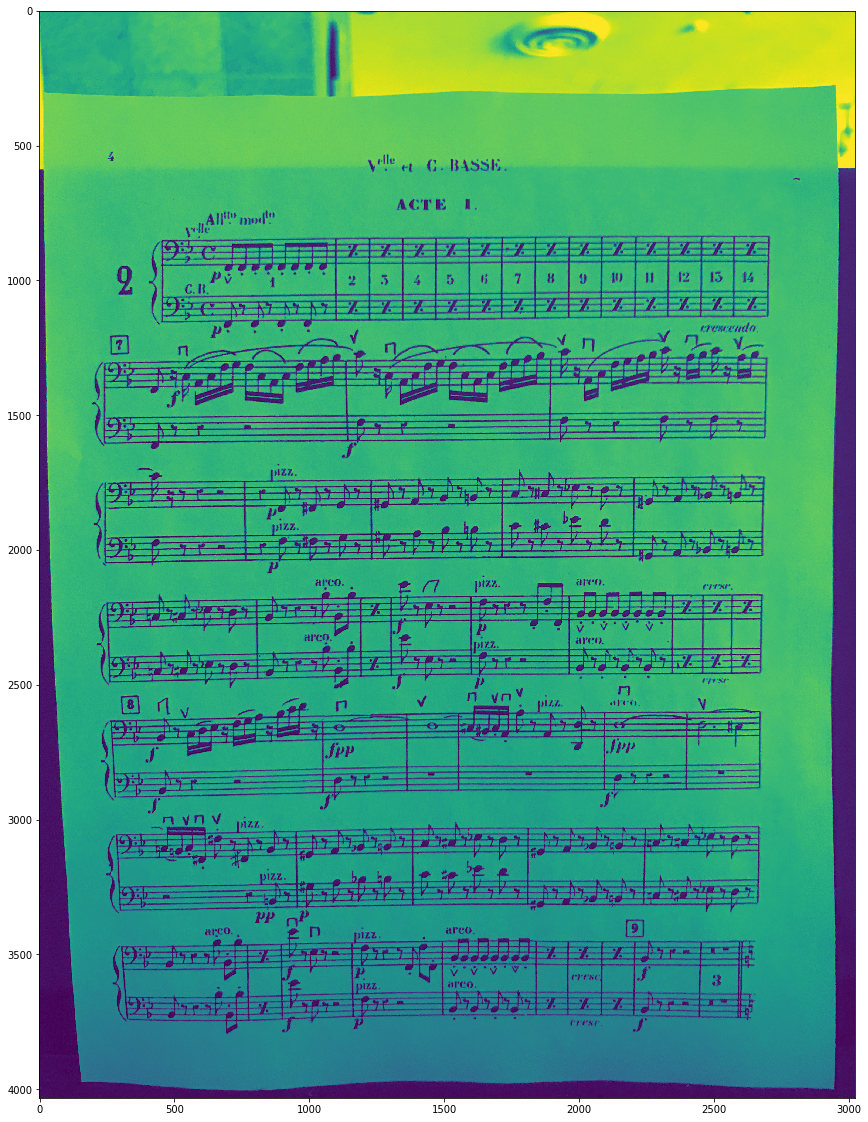

In [157]:
img = cv2.imread(query_path, 0)
plt.figure(figsize=(20,20))
plt.imshow(img)

In [158]:
kp_query, des_query = orb.detectAndCompute(img, None)

In [24]:
# FLANN_INDEX_KDTREE = 1
# index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
# search_params = dict(checks=50)

In [25]:
# flann = cv2.FlannBasedMatcher(index_params, search_params)

In [159]:
scoreList = []

In [68]:
# img1 = img
# #kp1 = kp_query
# img2 = cv2.imread(png_paths[3])
# #kp2 = db[png_paths[3]][0]

In [133]:
# kp1, des1 = orb.detectAndCompute(img1,None)
# kp2, des2 = orb.detectAndCompute(img2,None)

In [160]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
#matches = bf.match(des1,des2)

# Sort them in the order of their distance.
#matches = sorted(matches, key = lambda x:x.distance)

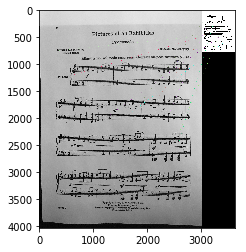

(<matplotlib.image.AxesImage at 0x7fa42c728a50>, None)

In [61]:
# # Draw first 10 matches.
# img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

# plt.imshow(img3),plt.show()

In [161]:
kp1 = kp_query
des1 = des_query

In [162]:
for idx in range(len(png_paths)):
    ref_path = png_paths[idx]
    #matches = flann.knnMatch(db[ref_path][1], des_query, k=2)

    img2 = cv2.imread(ref_path)

    kp2, des2 = orb.detectAndCompute(img2,None)
    
    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    
    matchList.append(matches)
    
    #img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
    #plt.imshow(img3,),plt.show()
    

    
    totalDistance = 0
    counterGood = 0
    # ratio test as per Lowe's paper
    for m in matches:
        #print("distance: ", m.distance)
        #print(m.distance)
        if m.distance < 50:
            counterGood += 1
            totalDistance += m.distance
            
    scoreList.append({
        'path': ref_path,
        'distance': totalDistance,
        'n_pairs': counterGood,
    })
    print("Finish searching {:}/{:} distance = {:} (# good pairs = {:})".format(idx+1, 
                                                                                len(png_paths), 
                                                                                totalDistance,
                                                                                counterGood))

Finish searching 1/210 distance = 909.0 (# good pairs = 21)
Finish searching 2/210 distance = 94.0 (# good pairs = 2)
Finish searching 3/210 distance = 143.0 (# good pairs = 3)
Finish searching 4/210 distance = 129.0 (# good pairs = 3)
Finish searching 5/210 distance = 562.0 (# good pairs = 12)
Finish searching 6/210 distance = 189.0 (# good pairs = 4)
Finish searching 7/210 distance = 181.0 (# good pairs = 4)
Finish searching 8/210 distance = 494.0 (# good pairs = 11)
Finish searching 9/210 distance = 147.0 (# good pairs = 3)
Finish searching 10/210 distance = 218.0 (# good pairs = 5)
Finish searching 11/210 distance = 231.0 (# good pairs = 5)
Finish searching 12/210 distance = 596.0 (# good pairs = 13)
Finish searching 13/210 distance = 260.0 (# good pairs = 6)
Finish searching 14/210 distance = 268.0 (# good pairs = 6)
Finish searching 15/210 distance = 321.0 (# good pairs = 7)
Finish searching 16/210 distance = 181.0 (# good pairs = 4)
Finish searching 17/210 distance = 330.0 (# go

Finish searching 144/210 distance = 416.0 (# good pairs = 9)
Finish searching 145/210 distance = 85.0 (# good pairs = 2)
Finish searching 146/210 distance = 493.0 (# good pairs = 11)
Finish searching 147/210 distance = 323.0 (# good pairs = 7)
Finish searching 148/210 distance = 282.0 (# good pairs = 6)
Finish searching 149/210 distance = 414.0 (# good pairs = 9)
Finish searching 150/210 distance = 277.0 (# good pairs = 6)
Finish searching 151/210 distance = 187.0 (# good pairs = 4)
Finish searching 152/210 distance = 309.0 (# good pairs = 7)
Finish searching 153/210 distance = 281.0 (# good pairs = 6)
Finish searching 154/210 distance = 325.0 (# good pairs = 7)
Finish searching 155/210 distance = 368.0 (# good pairs = 8)
Finish searching 156/210 distance = 309.0 (# good pairs = 7)
Finish searching 157/210 distance = 363.0 (# good pairs = 8)
Finish searching 158/210 distance = 185.0 (# good pairs = 4)
Finish searching 159/210 distance = 417.0 (# good pairs = 9)
Finish searching 160/210

In [163]:
filteredScore = [score for score in scoreList if score['n_pairs'] > 10]
sortedScore = sorted(filteredScore, key=lambda x: x['distance'])[:30]

[Rank = 1] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/512324_page_30.png has 11 good pairs and distance of 479.0


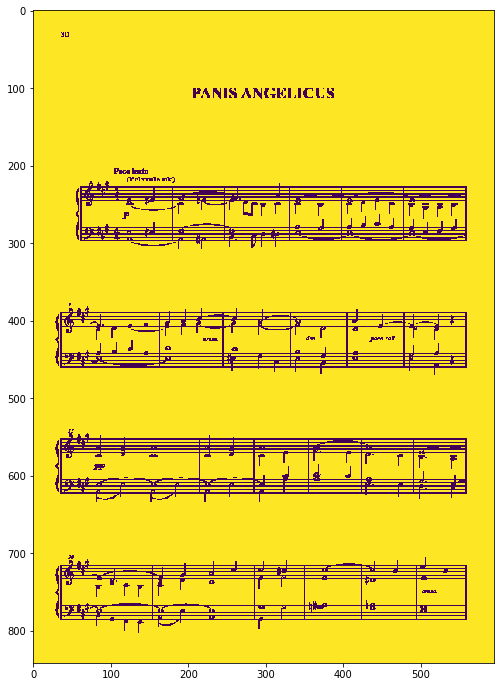

[Rank = 2] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/75838_page_1.png has 11 good pairs and distance of 480.0


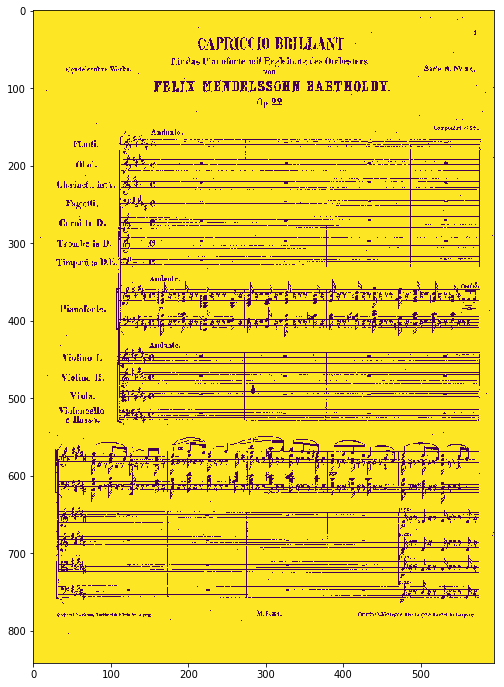

[Rank = 3] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/18971_page_107.png has 11 good pairs and distance of 486.0


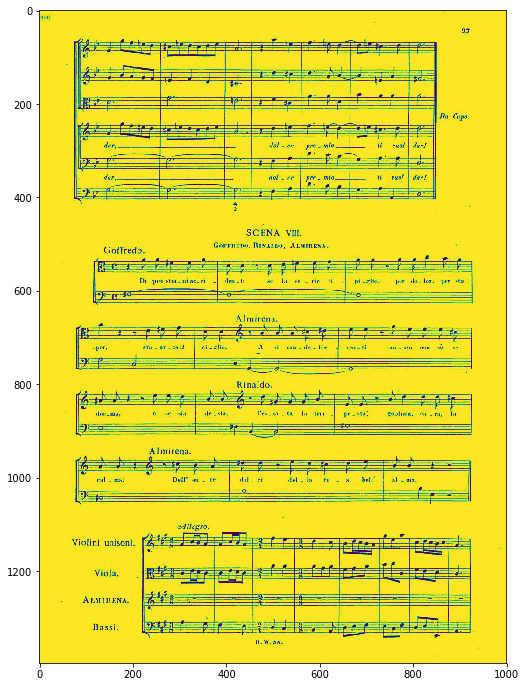

[Rank = 4] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/518271_page_5.png has 11 good pairs and distance of 493.0


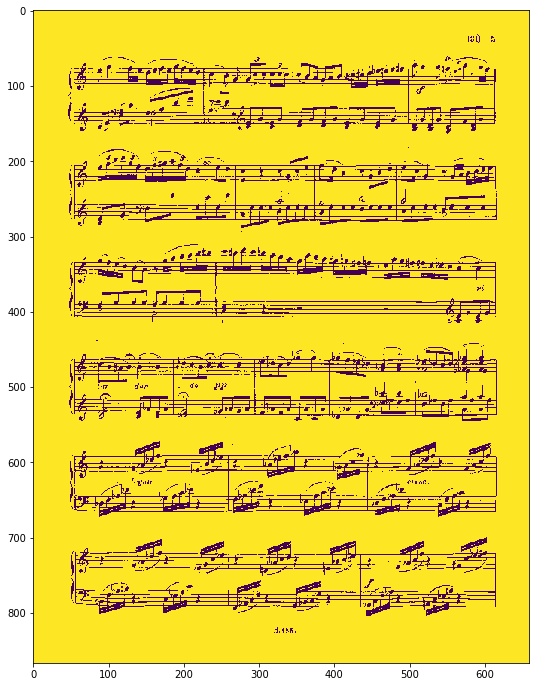

[Rank = 5] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/12100_page_30.png has 11 good pairs and distance of 494.0


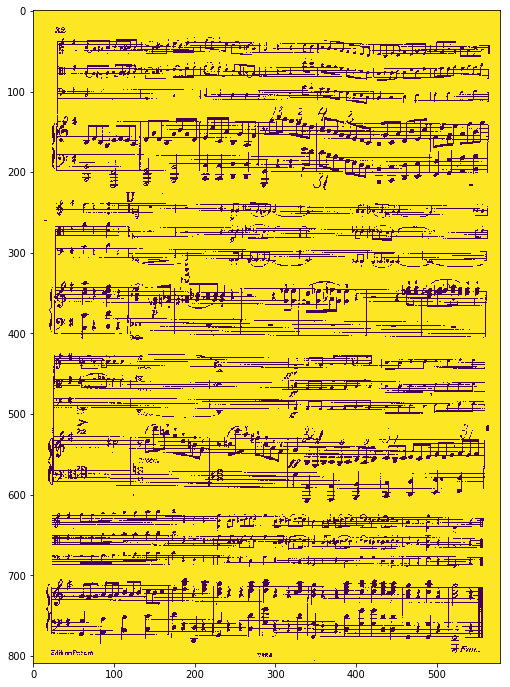

[Rank = 6] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/492192_page_21.png has 11 good pairs and distance of 498.0


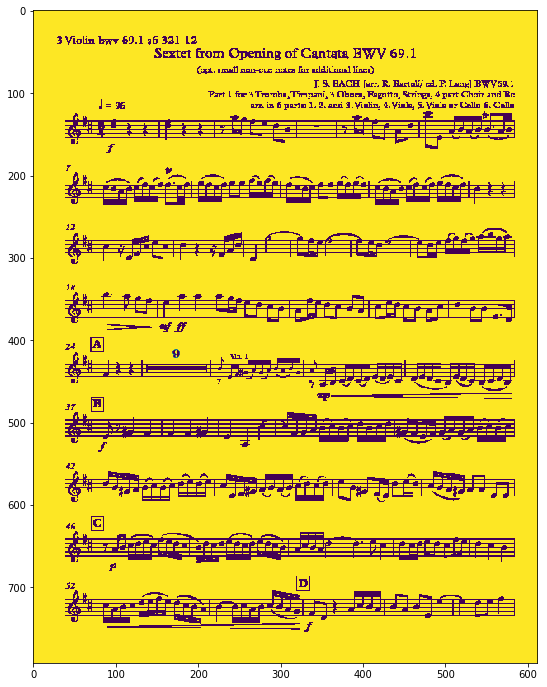

[Rank = 7] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/63999_page_192.png has 11 good pairs and distance of 499.0


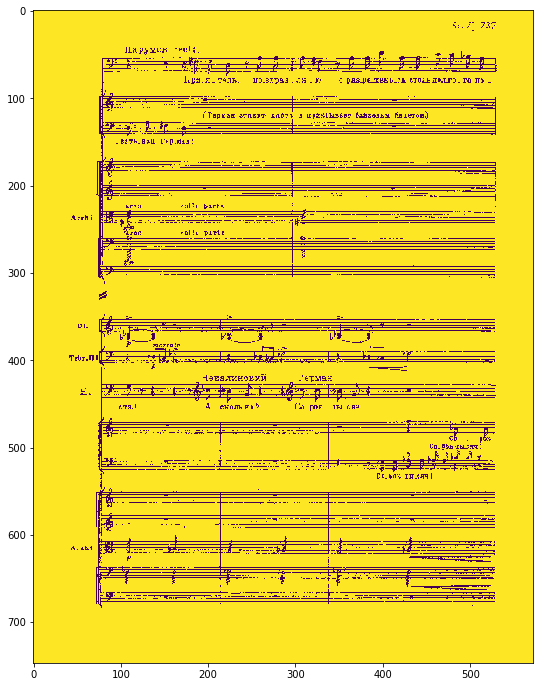

[Rank = 8] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/517023_page_108.png has 11 good pairs and distance of 499.0


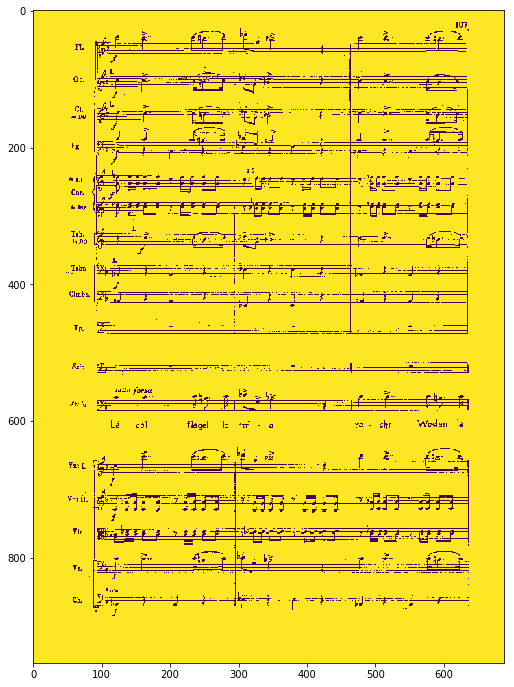

[Rank = 9] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/253851_page_2.png has 11 good pairs and distance of 507.0


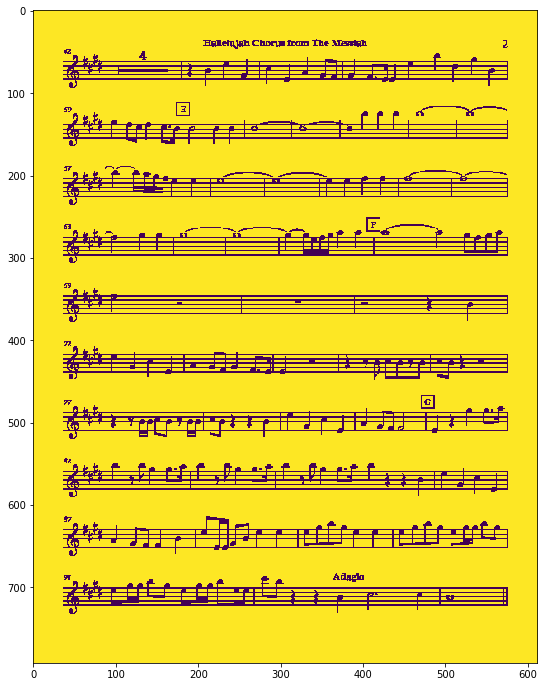

[Rank = 10] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/34787_page_11.png has 11 good pairs and distance of 508.0


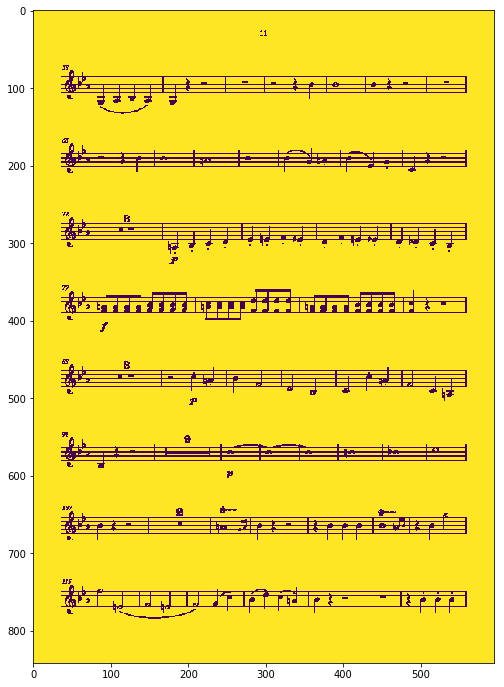

[Rank = 11] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/340340_page_96.png has 11 good pairs and distance of 511.0


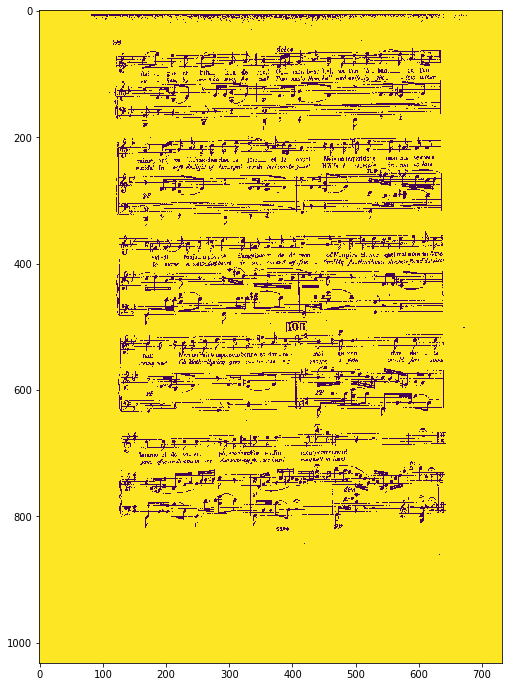

[Rank = 12] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/28595_page_19.png has 12 good pairs and distance of 521.0


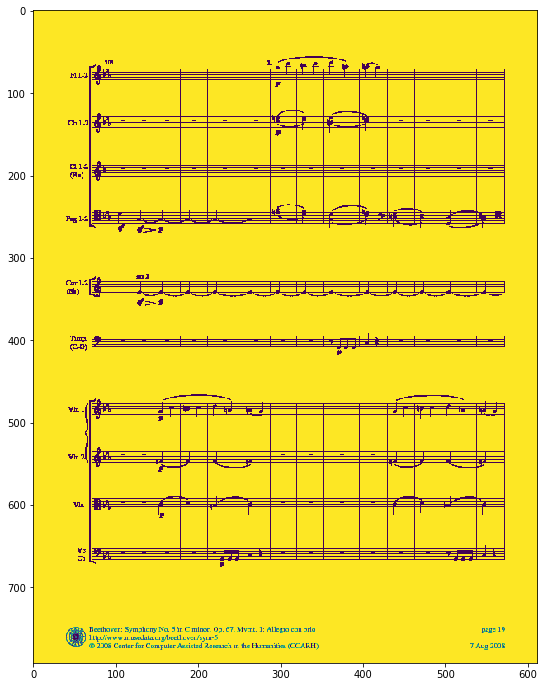

[Rank = 13] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/412274_page_386.png has 12 good pairs and distance of 536.0


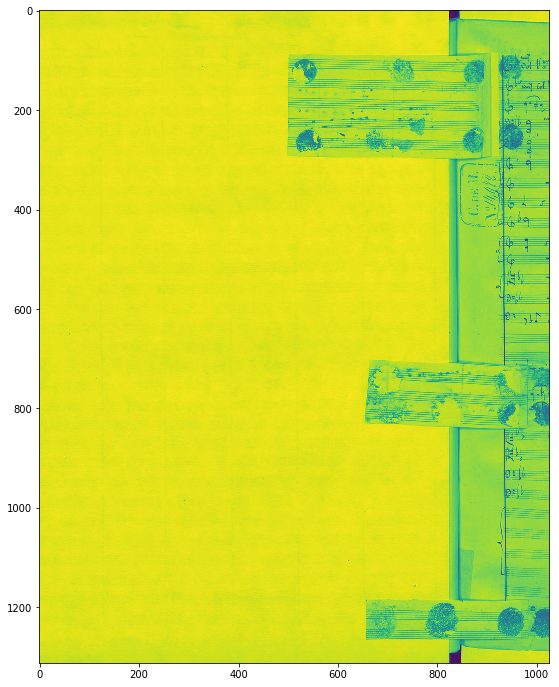

[Rank = 14] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/44543_page_7.png has 12 good pairs and distance of 536.0


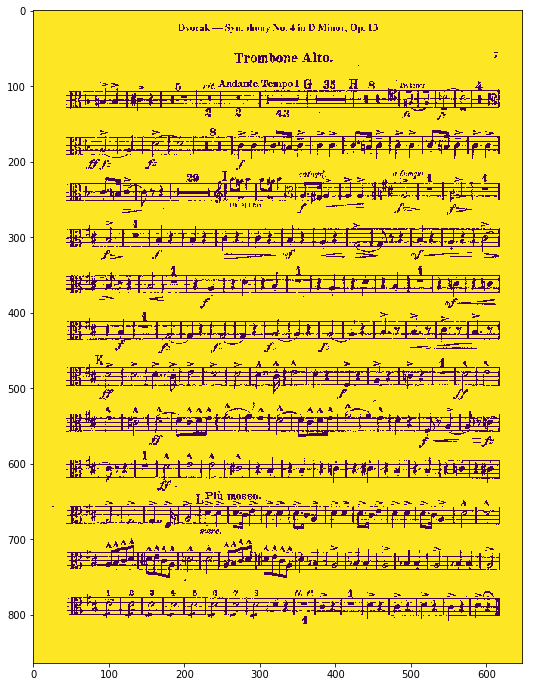

[Rank = 15] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/388502_page_1.png has 12 good pairs and distance of 537.0


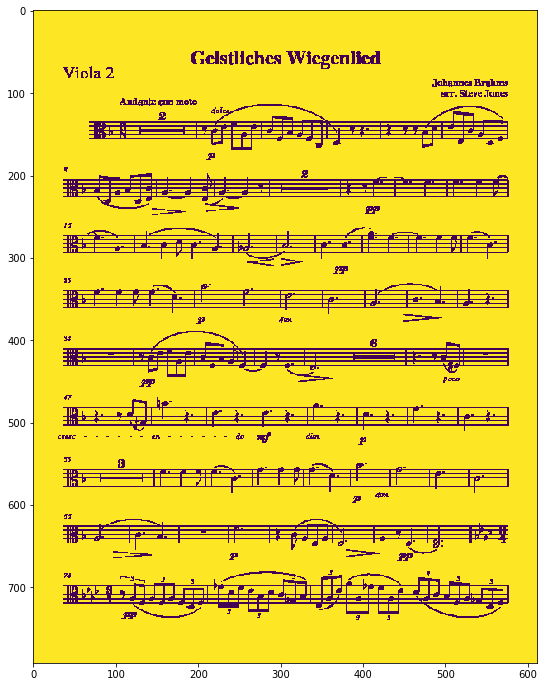

[Rank = 16] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/69747_page_12.png has 12 good pairs and distance of 550.0


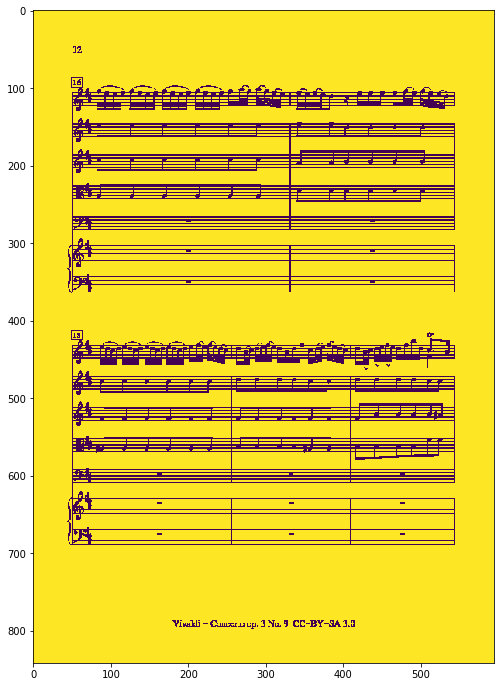

[Rank = 17] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/166951_page_33.png has 12 good pairs and distance of 556.0


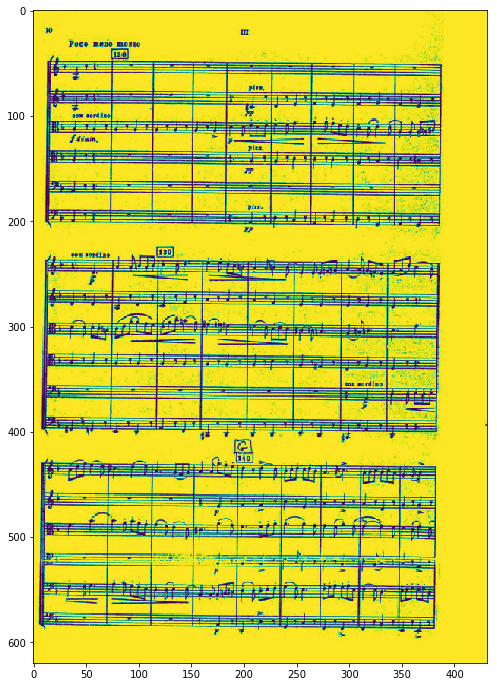

[Rank = 18] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/429093_page_40.png has 12 good pairs and distance of 562.0


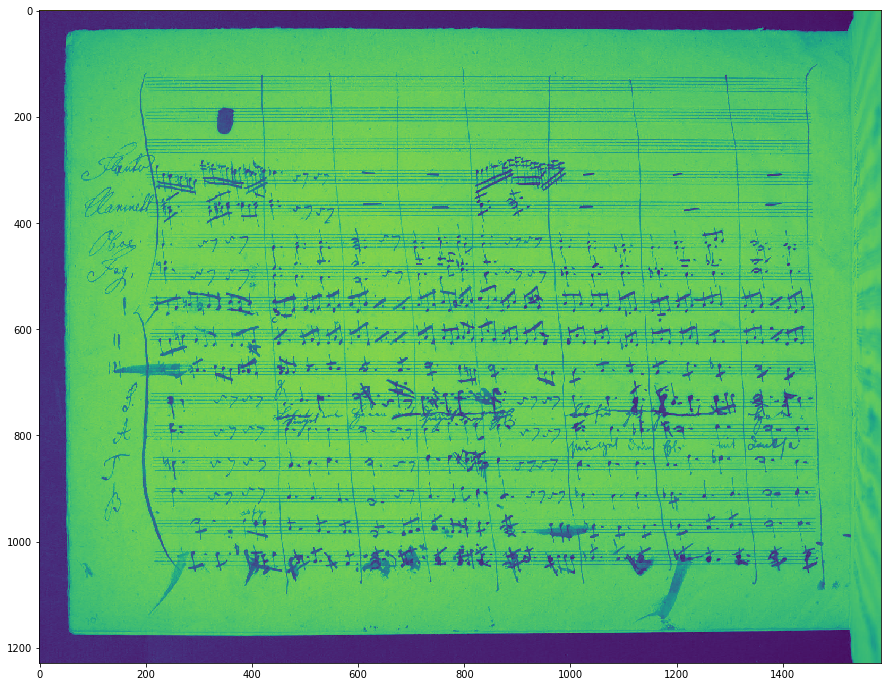

[Rank = 19] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/110319_page_23.png has 13 good pairs and distance of 568.0


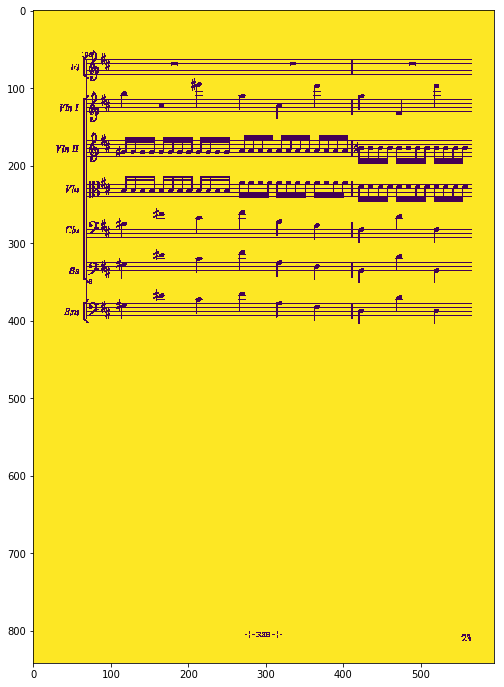

[Rank = 20] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/490343_page_9.png has 12 good pairs and distance of 568.0


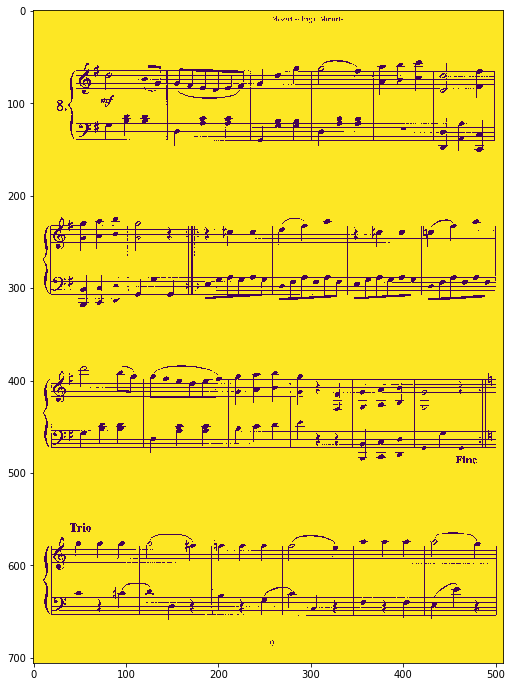

[Rank = 21] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/517025_page_594.png has 13 good pairs and distance of 574.0


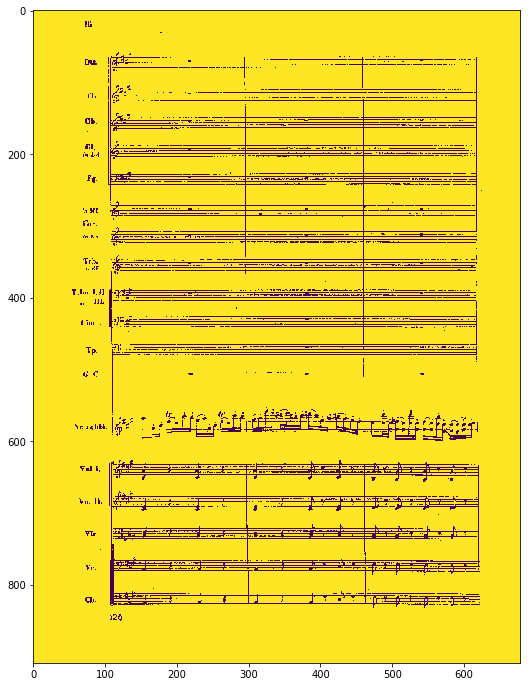

[Rank = 22] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/43615_page_22.png has 13 good pairs and distance of 575.0


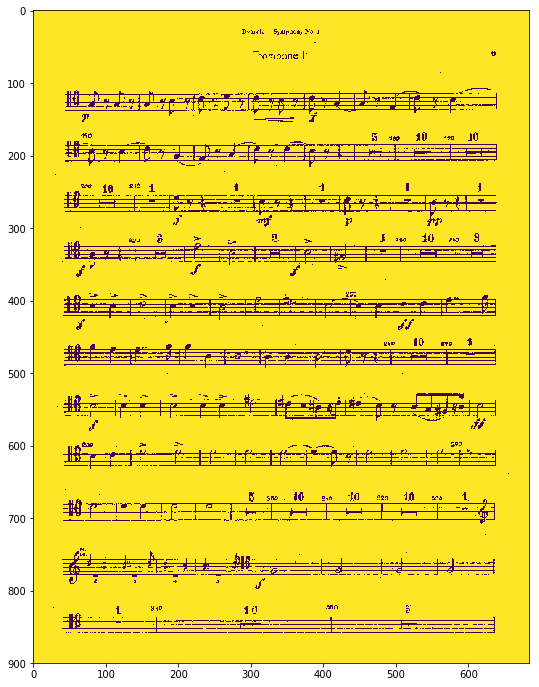

[Rank = 23] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/440770_page_289.png has 13 good pairs and distance of 578.0


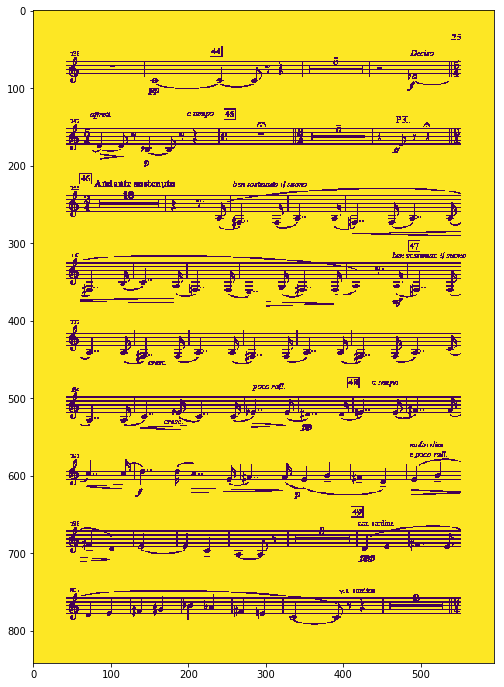

[Rank = 24] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/107692_page_8.png has 12 good pairs and distance of 578.0


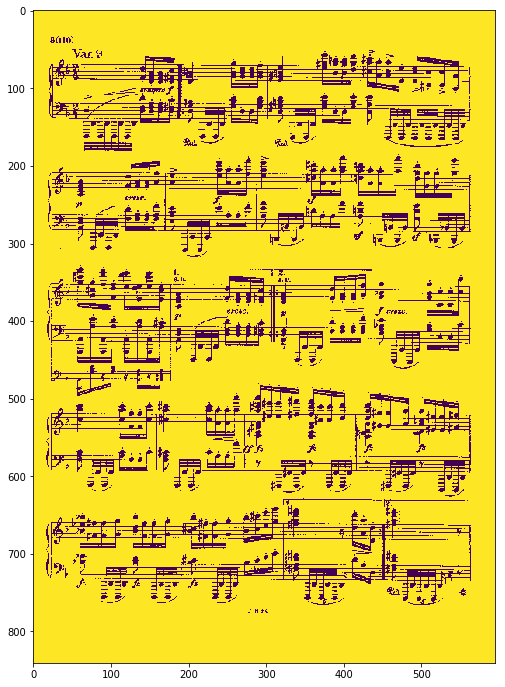

[Rank = 25] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/370600_page_1.png has 13 good pairs and distance of 583.0


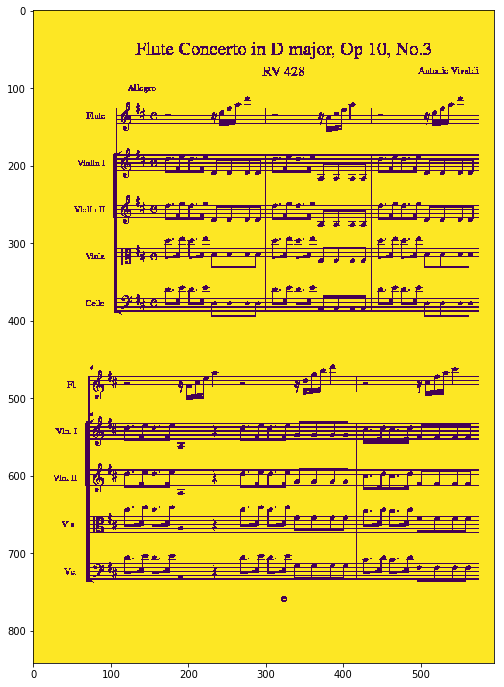

[Rank = 26] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/146002_page_3.png has 13 good pairs and distance of 584.0


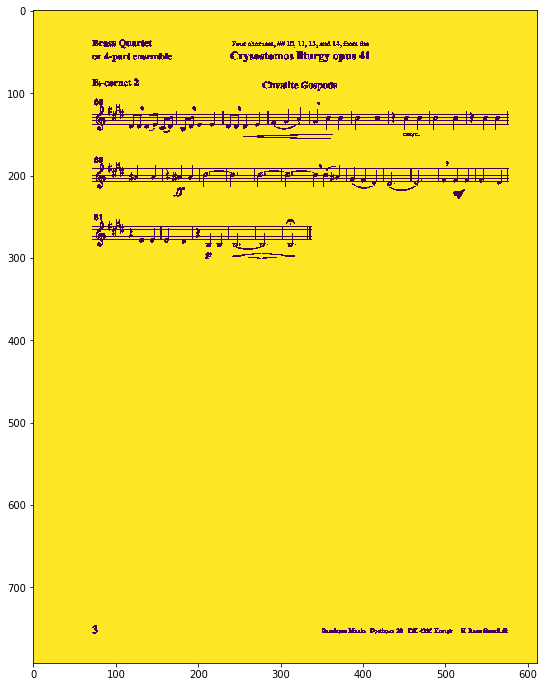

[Rank = 27] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/27475_page_7.png has 13 good pairs and distance of 592.0


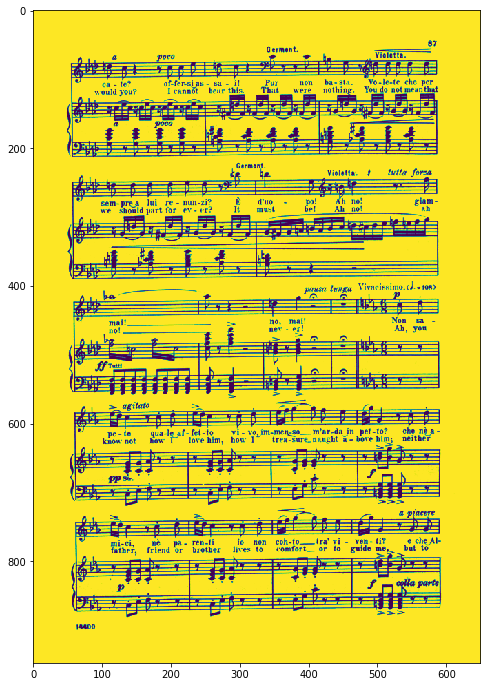

[Rank = 28] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/06028_page_50.png has 13 good pairs and distance of 595.0


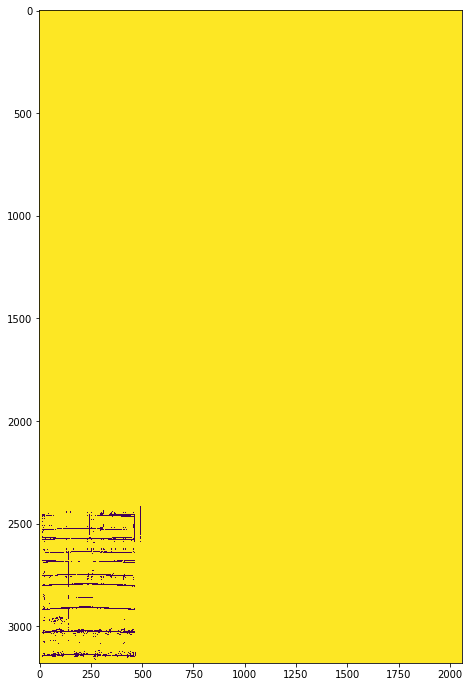

[Rank = 29] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/279915_page_22.png has 13 good pairs and distance of 596.0


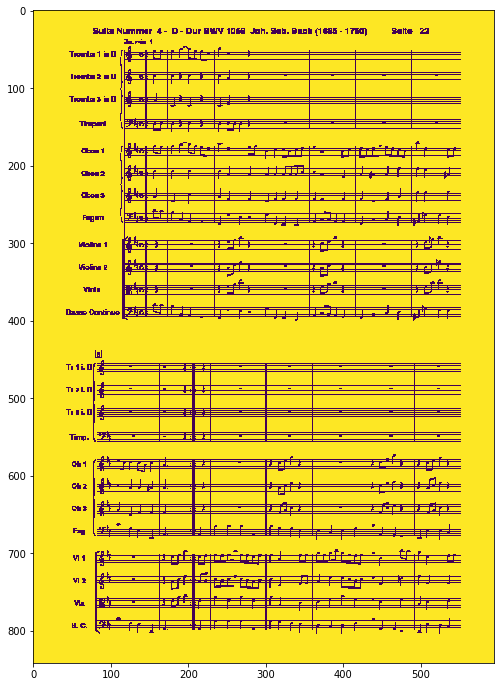

[Rank = 30] /data1/dbashir/Project/Summer 2018/pdf/mini_dataset_png/10719_page_3.png has 13 good pairs and distance of 596.0


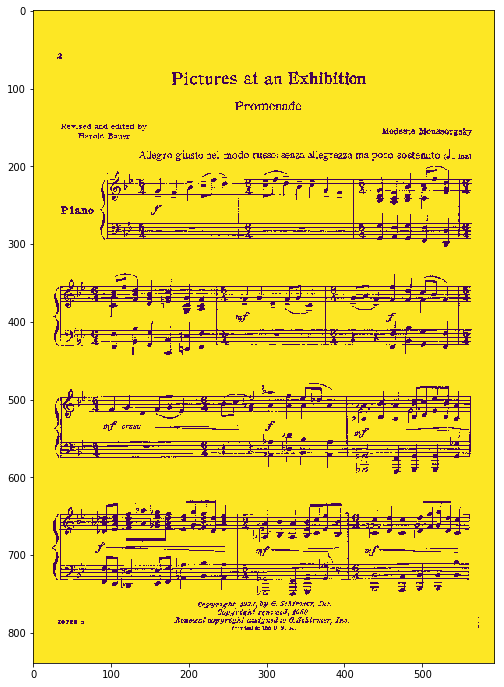

In [164]:
rank = 0
for score in sortedScore:
    rank += 1
    print("[Rank = {:}] {:} has {:} good pairs and distance of {:}".format(rank, score['path'], score['n_pairs'], score['distance']))
    distance = score['distance']
    score = cv2.imread(score['path'], 0)
    plt.figure(figsize=(20,12))
    plt.imshow(score)
    plt.show()

Experiment 1 on Pictures at an  Exhibition (9136): Correct img showed up as rank 22

Experiment 2 on (9137): Correct img not in top 30

Experiment 3 (9140): Not in top 30

Experiment 4 (9141): Not in top 30

Experiment 5 (9142): Not in top 30

Experiment 6 (9143): Not in top 30

Experiment 7 (9144): Not in top 30

Experiment 8 (9145): Not in top 11

Experiment 9 (9146): Not in top 30

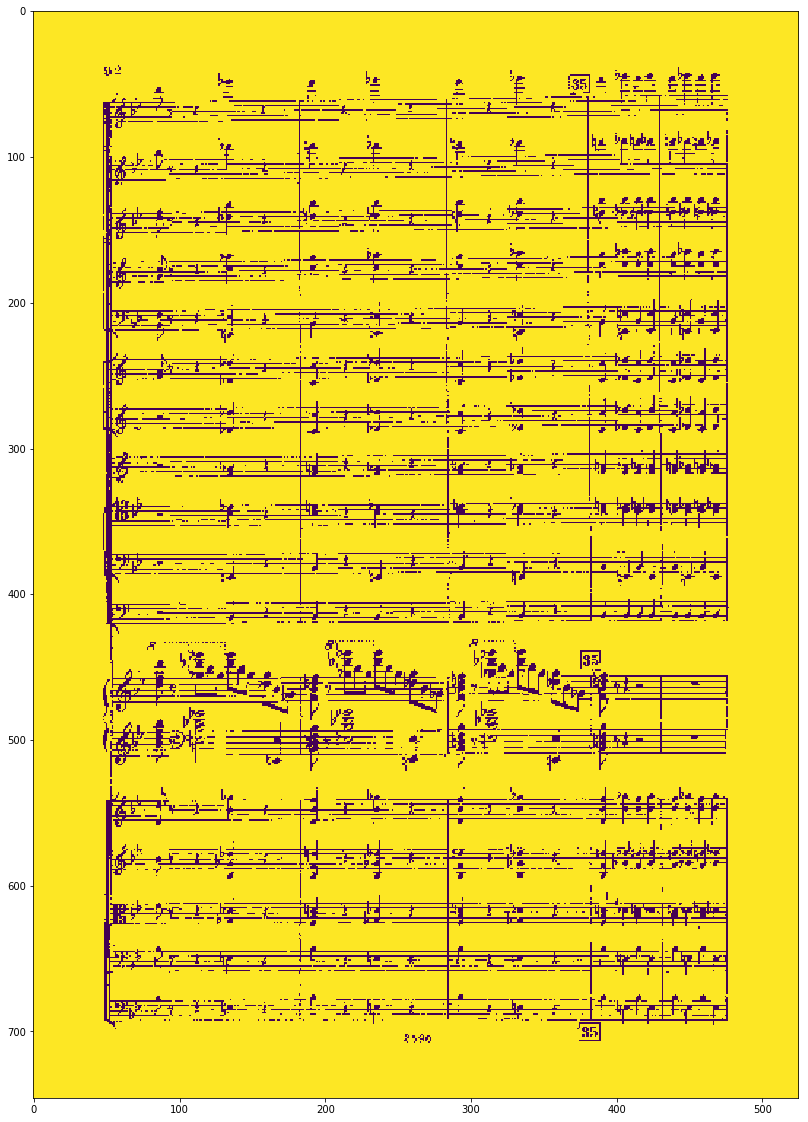

In [18]:
# Visualize the expected musical score
expected_path = os.path.join(DB_PATH, '105370_page_93.png')
expected_img = cv2.imread(expected_path, 0)
plt.figure(figsize=(20,20))
plt.imshow(expected_img)
plt.show()

In [19]:
img_db = cv2.imread(expected_path, 0)
img_query = cv2.imread(query_path, 0)
matches = flann.knnMatch(db[expected_path][1], des_query, k=2)

In [20]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
counterGood = 0
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        counterGood += 1
print("There are {:} good matched pairs".format(counterGood))

There are 158 good matched pairs


In [21]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

In [22]:
img3 = cv2.drawMatchesKnn(img_db,db[expected_path][0],img_query,kp_query,matches,None,**draw_params)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.show()